In [34]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.append("../source") 

In [35]:
import Discrete_Doucet_system as dd
reload(dd)

<module 'Discrete_Doucet_system' from '../source/Discrete_Doucet_system.py'>

In [36]:
T0 = 4
Nx_obs = 1000
Nx_dat = 1000
theta_approx0 = np.array([-1.5, 0., 0., 0.1, 0.2])
theta_approx = np.array([  9.78866872e-03, 4.99176141e-01, 2.49789192e+01, 5.98936442e+00, 0.2])
dsystem = dd.Discrete_Doucet_system()
dsystem0 = dd.Discrete_Doucet_system(theta = theta_approx0)
dsystem_approx = dd.Discrete_Doucet_system(theta = theta_approx)
simul  = dd.Simulate(T = T0) 
xobs,pobs = simul.simulate(dsystem, Nx = Nx_obs)
xdat, pdat= simul.simulate(dsystem_approx, Nx = Nx_dat)


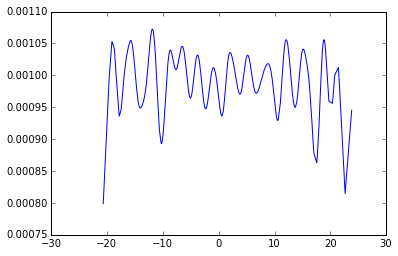

In [37]:
px = dsystem.compare(xdat, xobs) 

xdat_ordered = np.sort(xdat)
px_new_ordered = px[np.argsort(xdat)]

plt.plot(xdat_ordered, px_new_ordered)

In [38]:
Nx_test = 20000
alpha = 0.1
theta_approx = np.array([-1.5, 0, 0, 0.1, 0.2])
for iter in range(0,3):
        print "iteration " + str(iter) + ":" , theta_approx 
        dsystem_old = dd.Discrete_Doucet_system(theta = theta_approx)
        xdat_test, pdat_test= simul.simulate(dsystem_old, Nx_test,  seed = iter*2)
        px = Nx_test * dsystem.compare(xdat_test, xobs) 
        xdat_new, pdat_new, A_new, B_new = simul.simulate(dsystem_old, Nx_test,  seed = iter*2, Px = px, stat= True)
        xdat_old, pdat_old, A_old, B_old = simul.simulate(dsystem_old, Nx_test,  seed = iter*2+1, stat= True)
        theta_approx = np.array(np.linalg.inv(A_new + alpha*A_old) * np.matrix(B_new + alpha*B_old).transpose())
        theta_approx = np.array(theta_approx.transpose().tolist()[0] + [0.2])
        theta_approx[1] = np.sign(theta_approx[1]) *  np.min([np.abs(theta_approx[1]), 0.99999])

iteration 0: [-1.5  0.   0.   0.1  0.2]
iteration 1: [-1.43810612 -0.19646152  1.7587319   0.0136478   0.2       ]
iteration 2: [ 0.62666397 -0.27232283  3.1604779  -3.18492396  0.2       ]


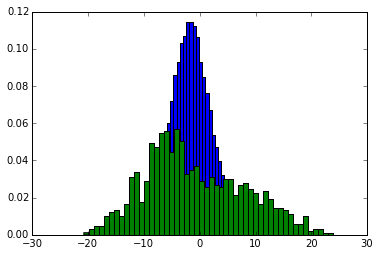

In [39]:
xplot= plt.hist(xdat_test,bins=50, normed=True)
xplot= plt.hist(xobs,bins=50, normed=True)


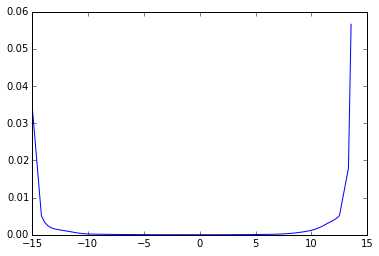

In [40]:
px = dsystem.compare(xdat_test, xobs) 

xdat_ordered = np.sort(xdat_test)
px_new_ordered = px[np.argsort(xdat_test)]

plt.plot(xdat_ordered, px_new_ordered)

In [41]:
n_iter = 10
theta_history = np.zeros([n_iter, len(theta_approx)]) 
theta_history[2] = theta_approx

In [42]:
import  main 
reload(main)

<module 'main' from '../source/main.pyc'>

In [43]:
test_seq = main.DM_test(Nx_obs = 1000, Nx_test = 15000, alpha =0.5, tend = 4, theta_init= theta_approx0) 
test_seq.run(3)

terminal time is 4
initial theta is:  [-1.5  0.   0.   0.1  0.2]
iteration 1: [-1.5  0.   0.   0.1  0.2]
iteration 2: [-1.86226179 -0.03752464  0.62560625  0.72696587  0.2       ]
iteration 3: [-2.9858863  -0.05121691  2.38093121  2.12076417  0.2       ]


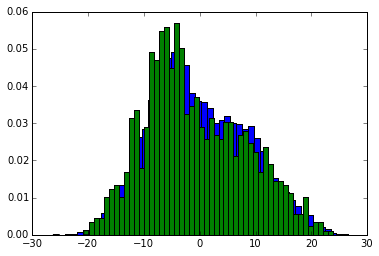

In [44]:
theta_try = np.array([  1.49326723,   0.27913057 , -9.27602837 ,-12.36208391,   0.2       ])
dsystem_try = dd.Discrete_Doucet_system(theta = theta_try)
xdat_try, pdat_try= simul.simulate(dsystem_try, Nx_test,  seed = iter*2)
xplot= plt.hist(xdat_try,bins=50, normed=True)
xplot= plt.hist(xobs,bins=50, normed=True)

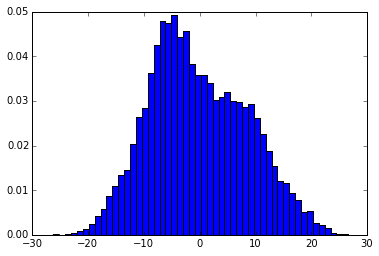

In [45]:
xplot= plt.hist(xdat_try,bins=50, normed=True)


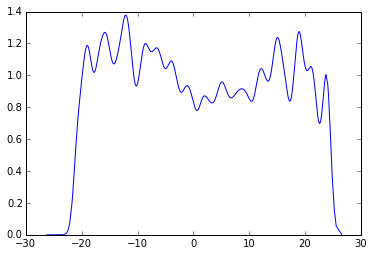

In [46]:
px_try = Nx_test * dsystem_try.compare(xdat_try, xobs) 
xdat_try_ordered = np.sort(xdat_try)
px_try_ordered = px_try[np.argsort(xdat_try)]

plt.plot(xdat_try_ordered, px_try_ordered)

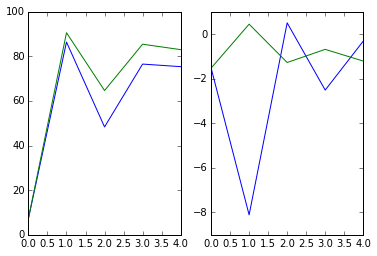

In [47]:
powers = np.array([1,2])
time = np.array(range(0,5))
mmt_truth = simul.moment_history(dsystem, powers, 10000) 
mmt_try = simul.moment_history(dsystem_try, powers, 10000) 
plt.subplot(1,2, 0)
plt.plot(time, mmt_try[0]) 
plt.plot(time, mmt_truth[0]) 

plt.subplot(1,2,1 )
plt.plot(time, mmt_try[1]) 
plt.plot(time, mmt_truth[1]) 

In [48]:
time = np.array(range(0,6))
type(time),type(mmt_try[0]), time.shape, mmt_try[0].shape

(numpy.ndarray, numpy.ndarray, (6,), (5,))

In [49]:
import timeit

start = timeit.timeit()
print "hello"
end = timeit.timeit()
print start -end

hello
0.00496912002563


In [96]:
import main
reload(main)
from timeit import default_timer as timer
theta_approx0 = np.array([-1.5, 0, 0, 0.1, 0.2])
nxobs = 1000
nxtest = 20000
alpha0 = 0.1
t_end = 15


test_seq = main.DM_test(Nx_obs = nxobs, Nx_test = nxtest, alpha =alpha0, tend = t_end, theta_init= theta_approx0)


start = timer()
test_seq.run(2)
end = timer()
print "elapsed time : "+ str(end - start)

terminal time is 15
initial theta is:  [-1.5  0.   0.   0.1  0.2]
iteration 1: [-1.5  0.   0.   0.1  0.2]
iteration 2: [-1.4631112   0.00708625  0.84099587  0.08242697  0.2       ]
elapsed time : 20.7859299183


In [51]:
start = timeit.timeit()
end = timeit.timeit()
end - start

-0.007656097412109375

In [52]:
theta_try2 = np.array([ 0.01680314,  0.92671352,  3.81007087,  0.21282745 , 0.2       ])
dsystem_try2 = dd.Discrete_Doucet_system(theta = theta_try2)


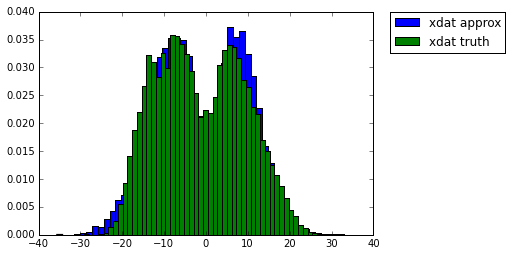

In [68]:
simul2 = dd.Simulate(T = t_end)
xobs2, pobs2= simul2.simulate(dsystem, Nx= nxtest,  seed = 2)
xdat_try2, pdat_try2= simul2.simulate(dsystem_try2, Nx = nxtest,  seed = 2)
plt.hist(xdat_try2,bins=50, normed=True, label = "xdat approx" )
plt.hist(xobs2,bins=50, normed=True, label = "xdat truth")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

(-40, 40)

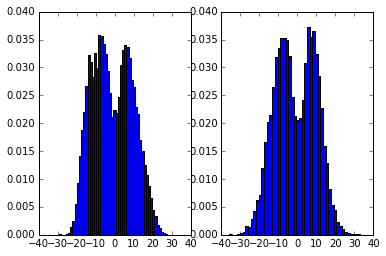

In [70]:
plt.subplot(1,2, 0)
plt.hist(xdat_try2,bins=50, normed=True)

plt.subplot(1,2,1 )
xplot= plt.hist(xobs2,bins=50, normed=True)
plt.ylim([0,0.04])
plt.xlim([-40,40])


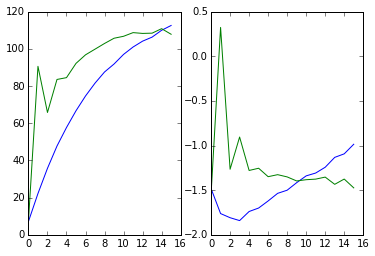

In [72]:
time = np.array(range(0,t_end+1))
mmt_truth2 = simul2.moment_history(dsystem, powers, 10000) 
mmt_try2 = simul2.moment_history(dsystem_try2, powers, 10000) 
plt.subplot(1,2, 0)
plt.plot(time, mmt_try2[0]) 
plt.plot(time, mmt_truth2[0]) 

plt.subplot(1,2,1 )
plt.plot(time, mmt_try2[1]) 
plt.plot(time, mmt_truth2[1]) 

In [58]:
mmt_try2[0].shape

(16,)

In [92]:
from datetime import datetime
d = datetime.now()
str(d.year) + "_" + str(d.month) + str(d.day) + "_" + str(d.hour) + str(d.minute)

'2015_925_1454'

In [94]:
d = datetime.now()
timenow = str(d.year) + "_" + str(d.month) + str(d.day) + "_" + str(d.hour) + str(d.minute)
filename = "transition" + timenow + ".txt"
filename

'transition2015_925_1458.txt'